# Time Series Forecasting

## Problem: 

<span style="font-family: Arial; font-weight:bold;font-size:1.75em;color:#0e92ea"> Sparkling Wine

For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

Data set for the Problem: Sparkling.csv

### Importing all libraries and basic packages

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from pylab import rcParams
from sklearn.metrics import r2_score
from   math              import sqrt
from   sklearn.metrics   import mean_squared_error
from   sklearn import metrics

from statsmodels.distributions.empirical_distribution import ECDF

import warnings
warnings.filterwarnings("ignore")

## Question 1 : Read the data as an appropriate Time Series data and plot the data. 

<span style="font-family: Arial; font-weight:bold;font-size:1.75em;color:#0e92ea"> Answer 1 :

In [3]:
df = pd.read_csv("Sparkling.csv", parse_dates = True, index_col = 'YearMonth')

In [5]:
df

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471
...,...
1995-03-01,1897
1995-04-01,1862
1995-05-01,1670


In [6]:
df.isnull().sum()

Sparkling    0
dtype: int64

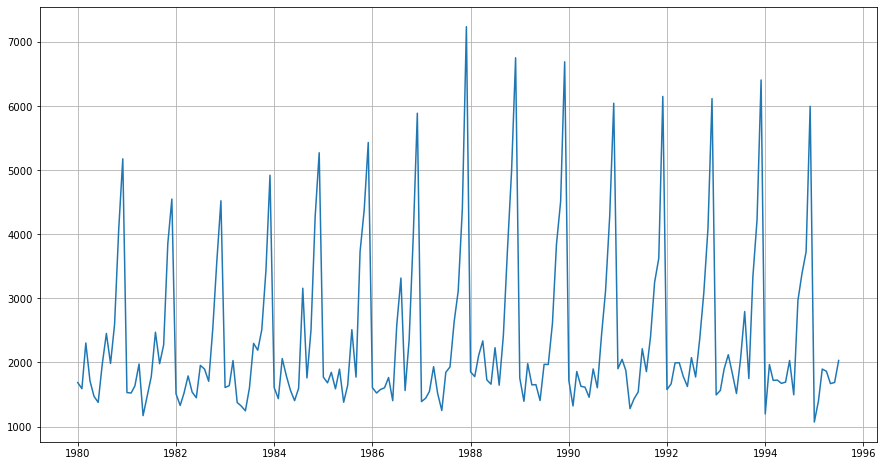

In [7]:
rcParams['figure.figsize'] = 15,8
plt.plot(df)
plt.grid()

### There is some seasonality in the wine sales.

## Question 2: Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

<span style="font-family: Arial; font-weight:bold;font-size:1.75em;color:#0e92ea"> Answer 2 :

In [8]:
df.isnull().sum()

Sparkling    0
dtype: int64

### Yearly Sales

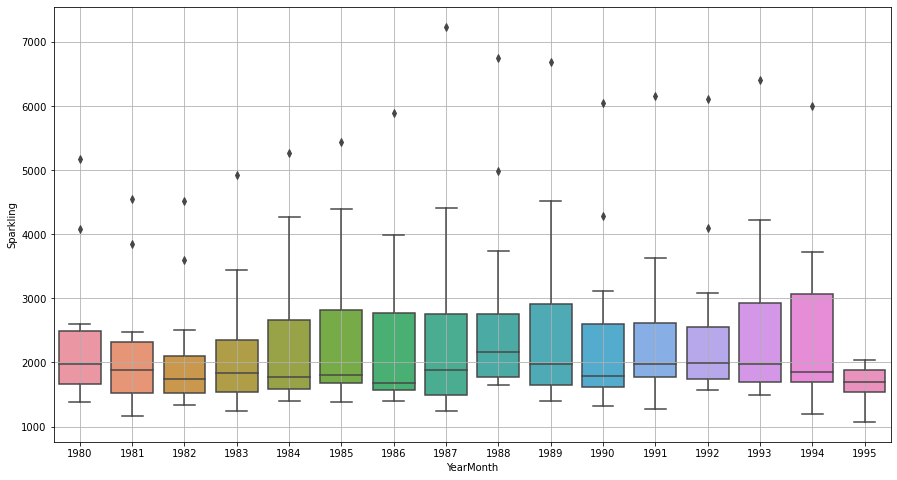

In [9]:
sns.boxplot(x = df.index.year,y = df['Sparkling'])
plt.grid();

### Monthly Sales 

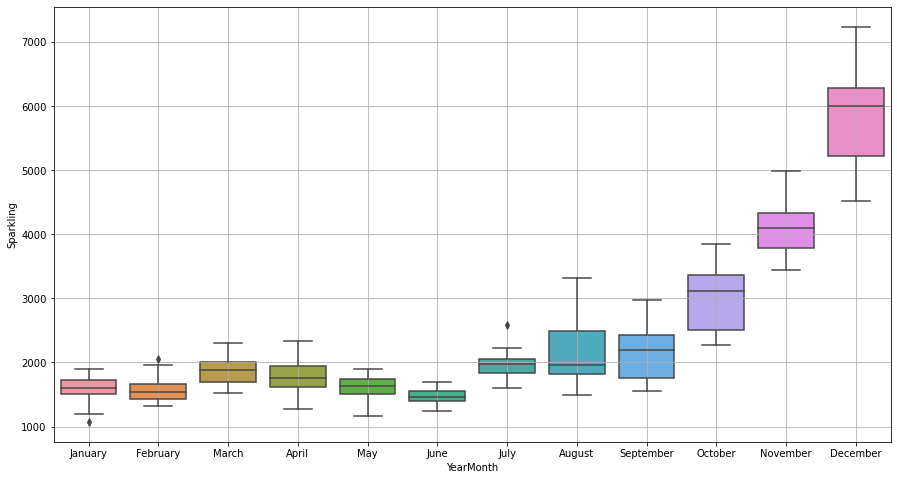

In [10]:
sns.boxplot(x = df.index.month_name(),y = df['Sparkling'])
plt.grid();

### Time series monthplot to understand the spread of Sales across different years and within different months across years.

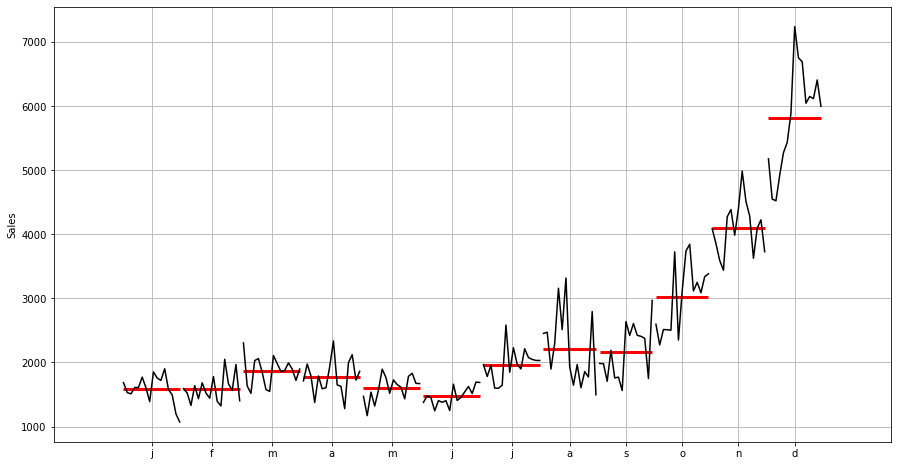

In [11]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(df['Sparkling'],  ylabel='Sales')
plt.grid();

### Plot of monthly Sales across years.

In [12]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Sparkling', columns = df.index.month_name(), index = df.index.year)
monthly_sales_across_years

YearMonth,April,August,December,February,January,July,June,March,May,November,October,September
YearMonth,,,,,,,,,,,,
1980,1712.0,2453.0,5179.0,1591.0,1686.0,1966.0,1377.0,2304.0,1471.0,4087.0,2596.0,1984.0
1981,1976.0,2472.0,4551.0,1523.0,1530.0,1781.0,1480.0,1633.0,1170.0,3857.0,2273.0,1981.0
1982,1790.0,1897.0,4524.0,1329.0,1510.0,1954.0,1449.0,1518.0,1537.0,3593.0,2514.0,1706.0
1983,1375.0,2298.0,4923.0,1638.0,1609.0,1600.0,1245.0,2030.0,1320.0,3440.0,2511.0,2191.0
1984,1789.0,3159.0,5274.0,1435.0,1609.0,1597.0,1404.0,2061.0,1567.0,4273.0,2504.0,1759.0
1985,1589.0,2512.0,5434.0,1682.0,1771.0,1645.0,1379.0,1846.0,1896.0,4388.0,3727.0,1771.0
1986,1605.0,3318.0,5891.0,1523.0,1606.0,2584.0,1403.0,1577.0,1765.0,3987.0,2349.0,1562.0
1987,1935.0,1930.0,7242.0,1442.0,1389.0,1847.0,1250.0,1548.0,1518.0,4405.0,3114.0,2638.0
1988,2336.0,1645.0,6757.0,1779.0,1853.0,2230.0,1661.0,2108.0,1728.0,4988.0,3740.0,2421.0


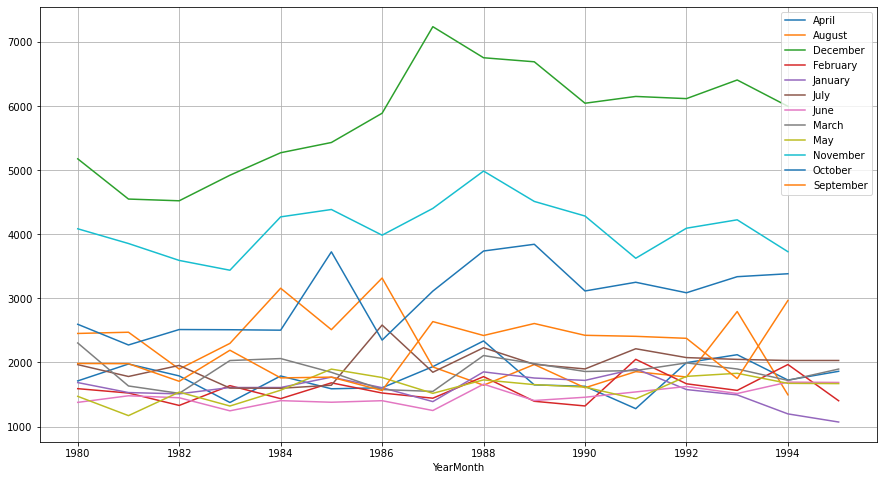

In [13]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend();

### Plotting the Empirical Cumulative Distribution.

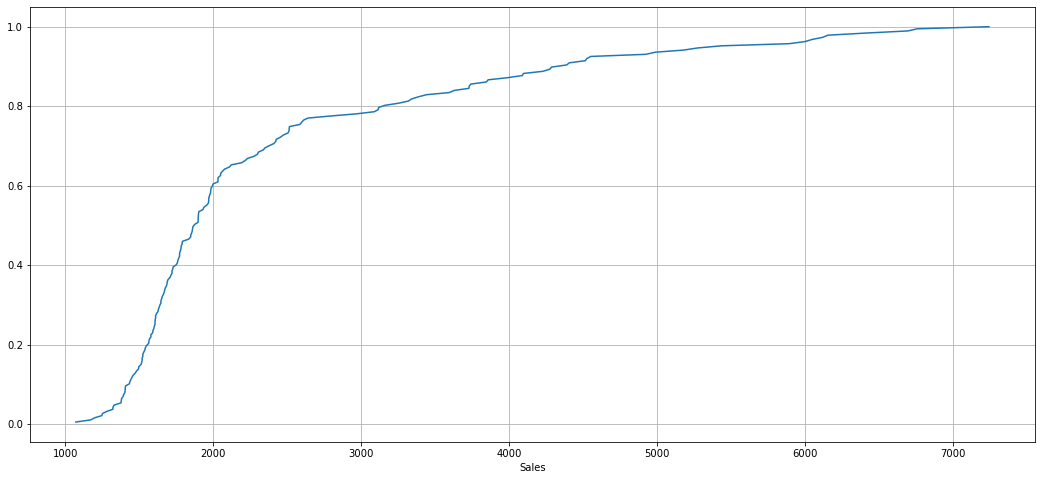

In [14]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

#### This particular graph tells us what percentage of data points refer to what number of Sales.


### Plotting the average Sales per month and the month on month percentage change of Wine Sales.

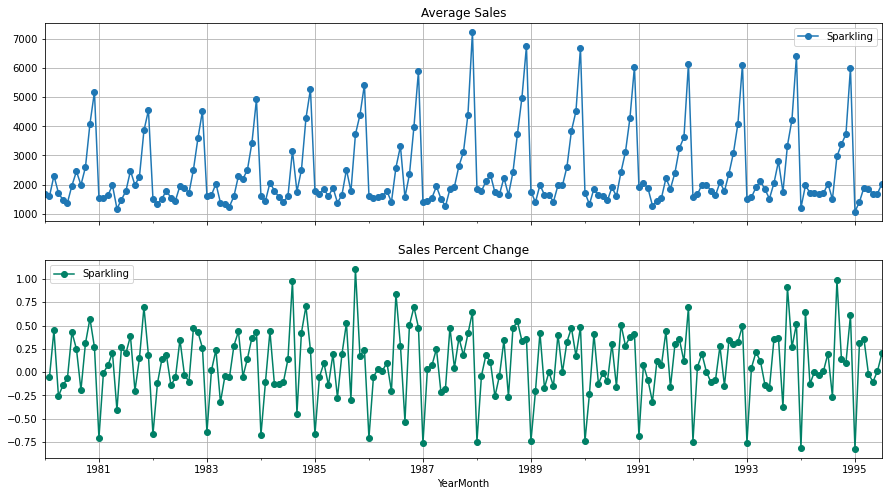

In [15]:
# group by date and get average Sales, and precent change
average    = df.groupby(df.index)["Sparkling"].mean()
pct_change = df.groupby(df.index)["Sparkling"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sales Percent Change",grid=True)

#### The above two graphs tells us the Average 'Sales' and the Percentage change of 'Sales' with respect to the time.

## Decomposing the Time Series and plot the different components

### Additive

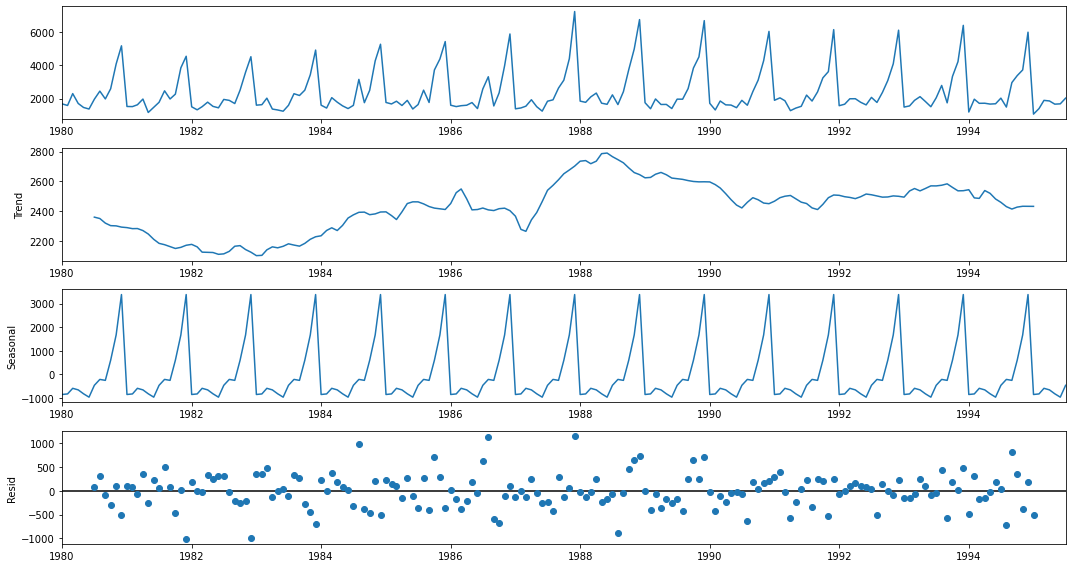

In [16]:
decomposition = seasonal_decompose(df,model='additive')
decomposition.plot();

### Multiplicative

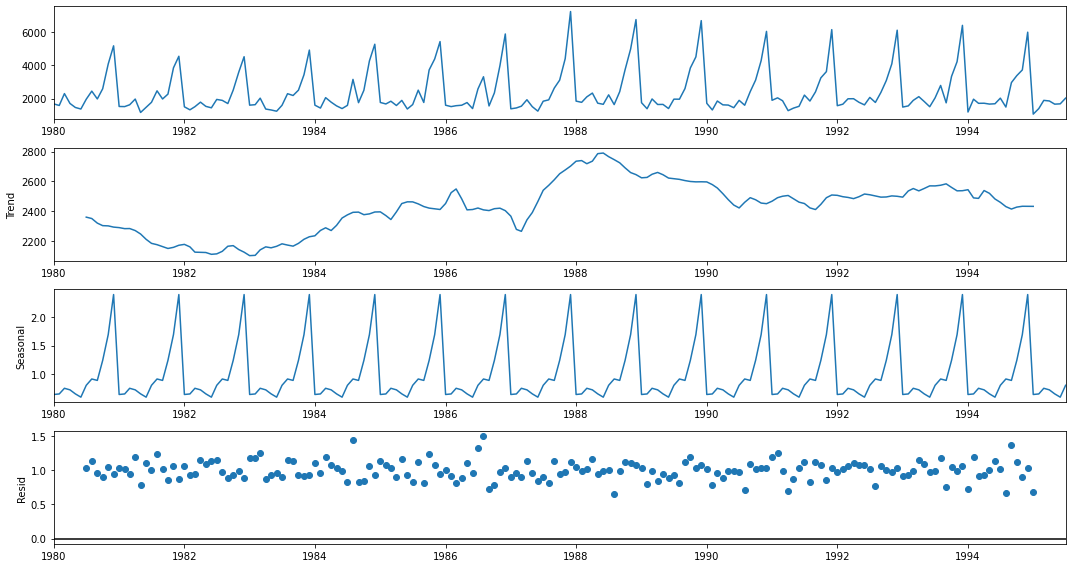

In [17]:
decomposition = seasonal_decompose(df,model='multiplicative')
decomposition.plot();

## Question 3: Split the data into training and test. The test data should start in 1991.

<span style="font-family: Arial; font-weight:bold;font-size:1.75em;color:#0e92ea"> Answer 3 :

In [18]:
train=df[df.index.year <1991]
test=df[df.index.year >=1991]

In [19]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [20]:
train.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [21]:
test.head()

,Sparkling
YearMonth,
1991-01-01,1902
1991-02-01,2049
1991-03-01,1874
1991-04-01,1279
1991-05-01,1432


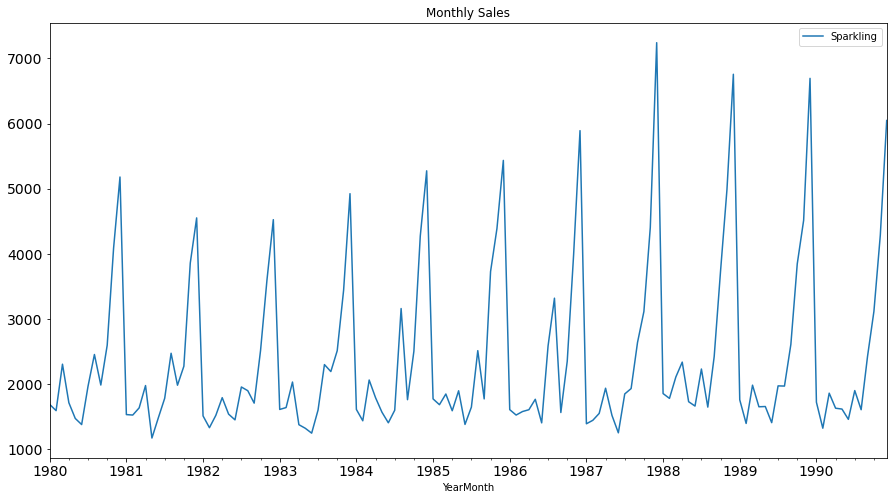

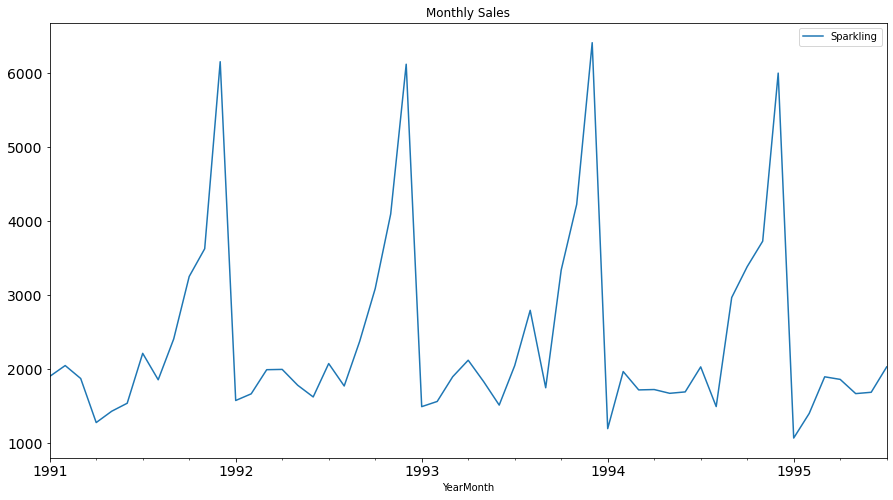

In [22]:
train.plot(figsize=(15,8), title= 'Monthly Sales', fontsize=14)
test.plot(figsize=(15,8), title= 'Monthly Sales', fontsize=14)

## Question 4: Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models should also be built on the training data and check the performance on the test data using RMSE.

<span style="font-family: Arial; font-weight:bold;font-size:1.75em;color:#0e92ea"> Answer 4 :

## Model 1: Simple Exponential Smoothing

In [159]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [160]:
SES = SimpleExpSmoothing(train['Sparkling'])

In [161]:
model_fit = SES.fit(optimized = True,use_brute=True)

print('')

print('Smoothing Level', np.round(model_fit.params['smoothing_level'], 4))
print('Initial Level',   np.round(model_fit.params['initial_level'], 4))
print('')


Smoothing Level 0.0
Initial Level 2403.77



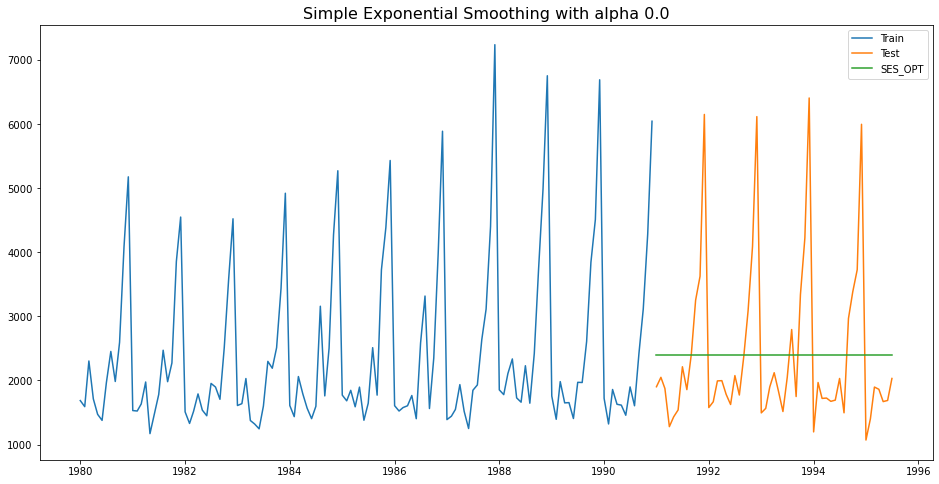

In [162]:
y_hat_avg = test.copy()
y_hat_avg['SES']     = model_fit.forecast(len(test['Sparkling']))
alpha_value          = np.round(model_fit.params['smoothing_level'], 4)


plt.figure(figsize=(16,8))
plt.plot(train.index, train['Sparkling'], label = 'Train')
plt.plot(test.index, test['Sparkling'],   label = 'Test')
plt.plot(test.index, y_hat_avg.SES,   label = 'SES_OPT')
plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value))
plt.legend(loc='best') 
plt.show()

In [163]:
def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [164]:
rmse             =  np.sqrt(mean_squared_error(test['Sparkling'], y_hat_avg.SES))
mape             =  MAPE(test['Sparkling'], y_hat_avg.SES)

print("For alpha = %1.2f,  RMSE is %3.4f     MAPE is %3.2f" %(alpha_value, rmse, mape))

For alpha = 0.00,  RMSE is 1275.0818     MAPE is 38.90


In [165]:
resultsDf = pd.DataFrame({'Method':['Simple Exponential Smoothing (alpha = 0)'], 'RMSE': [rmse], 'MAPE' : [mape]})
pd.set_option('display.max_colwidth', -1)
resultsDf

,Method,RMSE,MAPE
0,Simple Exponential Smoothing (alpha = 0),1275.081766,38.9


## Simple Exponential Smoothing - Optimized Alpha

In [166]:
model_SES = SimpleExpSmoothing(train['Sparkling'])

In [167]:
resultsDf_model = pd.DataFrame({'Alpha Values':[],'Test RMSE': []})
resultsDf_model

,Alpha Values,Test RMSE


In [168]:
SES_train = train.copy()
SES_test = test.copy()

In [169]:
for i in np.arange(0.00,1,0.01):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(test))
    
    rmse_model2_test_i = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict',i],squared=False)
    
    resultsDf_model = resultsDf_model.append({'Alpha Values':i
                                              ,'Test RMSE':rmse_model2_test_i}, ignore_index=True)

In [170]:
resultsDf_model

,Alpha Values,Test RMSE
0,0.00,1460.954675
1,0.01,1281.032699
2,0.02,1279.495201
3,0.03,1293.110073
4,0.04,1305.462953
...,...,...
95,0.95,3778.432623
96,0.96,3796.048620
97,0.97,3813.437370
98,0.98,3830.602869


### It is observed that the model is best fit when Alpha is zero.

## Model 2: Holt's Method (Double Exponential Smoothing)

In [171]:
import statsmodels.api as sm

y_hat_avg = test.copy()

model_fit = Holt(np.asarray(train['Sparkling'])).fit(optimized = True,use_brute=True)
y_hat_avg['Holt_linear'] = model_fit.forecast(len(test))

In [172]:
print('')

alpha_value = np.round(model_fit.params['smoothing_level'], 4)
beta_value  = np.round(model_fit.params['smoothing_slope'], 4)

print('Smoothing Level', alpha_value )
print('Smoothing Slope', beta_value)
print('Initial Level',   np.round(model_fit.params['initial_level'], 4))
print('')


Smoothing Level 0.6478
Smoothing Slope 0.0
Initial Level 1686.0838



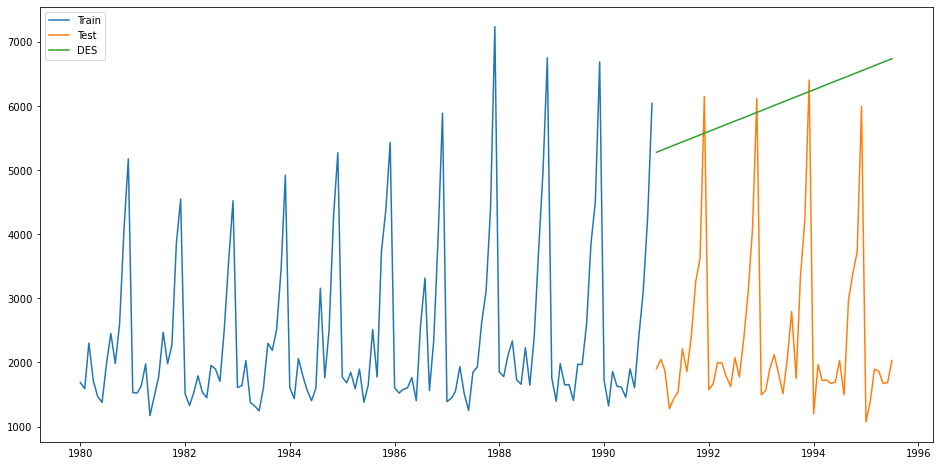

In [173]:
plt.figure(figsize=(16,8))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='DES')
plt.legend(loc='best')
plt.show()

In [174]:
rmse             =  np.sqrt(mean_squared_error(test['Sparkling'], y_hat_avg['Holt_linear']))
mape             =  MAPE(test['Sparkling'], y_hat_avg['Holt_linear'])

print("For alpha = %1.2f,  RMSE is %3.4f MAPE is %3.2f" %(alpha_value, rmse, mape))

For alpha = 0.65,  RMSE is 3850.9410 MAPE is 152.06


In [175]:
tempResultsDf = pd.DataFrame({'Method': 'Double Exponential Smoothing (alpha = 0.65)', 'RMSE': [rmse], 'MAPE' : [mape]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
print(resultsDf)

                                        Method         RMSE    MAPE
0  Simple Exponential Smoothing (alpha = 0)     1275.081766  38.90 
0  Double Exponential Smoothing (alpha = 0.65)  3850.940953  152.06


## Double Exponential Smoothing - Optimized Alpha, Beta

In [176]:
DES_train = train.copy()
DES_test = test.copy()

In [177]:
model_DES = Holt(DES_train['Sparkling'])

In [178]:
resultsDf_model = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Test RMSE': []})
resultsDf_model

,Alpha Values,Beta Values,Test RMSE


In [179]:
for i in np.arange(0.05,1.05,0.05):
    for j in np.arange(0.05,1.05,0.05):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test))
        
        
        rmse_model4_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False)
        
        resultsDf_model = resultsDf_model.append({'Alpha Values':i,'Beta Values':j
                                          ,'Test RMSE':rmse_model4_test}, ignore_index=True)

In [180]:
resultsDf_model

,Alpha Values,Beta Values,Test RMSE
0,0.05,0.05,1418.407668
1,0.05,0.10,1466.899629
2,0.05,0.15,1457.041594
3,0.05,0.20,1443.099273
4,0.05,0.25,1550.422496
...,...,...,...
395,1.00,0.80,55442.273880
396,1.00,0.85,56677.130498
397,1.00,0.90,57823.177011
398,1.00,0.95,58888.482146


In [181]:
resultsDf_model.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Beta Values,Test RMSE
0,0.05,0.05,1418.407668
3,0.05,0.20,1443.099273
2,0.05,0.15,1457.041594
1,0.05,0.10,1466.899629
6,0.05,0.35,1547.022626
...,...,...,...
398,1.00,0.95,58888.482146
359,0.90,1.00,59008.254331
379,0.95,1.00,59518.766107
399,1.00,1.00,59877.076519


In [182]:
model_DES_alpha_i_j = model_DES.fit(smoothing_level=0.05,smoothing_slope=0.05,optimized=False,use_brute=True)

In [183]:
predict = DES_test
predict['DES'] = model_DES_alpha_i_j.forecast(len(DES_test))

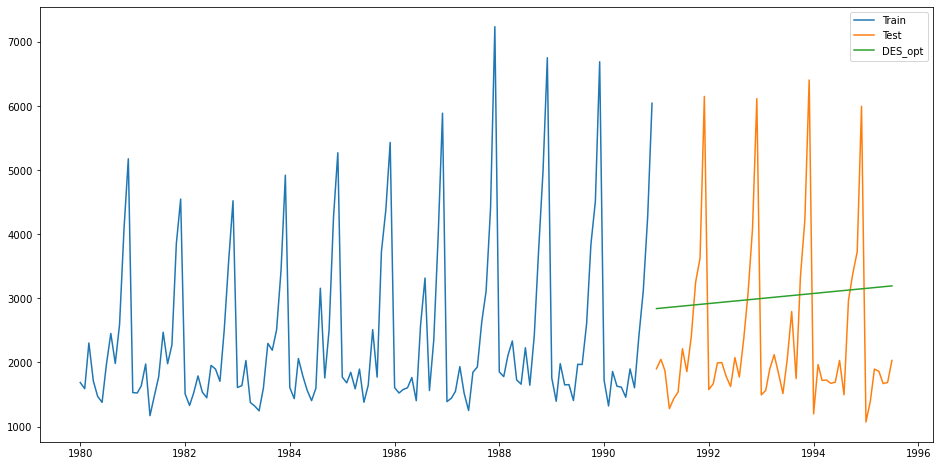

In [184]:
plt.figure(figsize=(16,8))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(predict['DES'], label='DES_opt')
plt.legend(loc='best')
plt.show()

In [185]:
rmse             =  np.sqrt(mean_squared_error(DES_test['Sparkling'], predict['DES']))
mape             =  MAPE(DES_test['Sparkling'], predict['DES'])

print("RMSE is %3.4f MAPE is %3.2f" %(rmse, mape))

RMSE is 1418.4077 MAPE is 51.76


In [186]:
tempResultsDf = pd.DataFrame({'Method': 'Double Exponential Smoothing - Optimized (alpha = 0.05, Beta = 0.05', 'RMSE': [rmse], 'MAPE' : [mape]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,RMSE,MAPE
0,Simple Exponential Smoothing (alpha = 0),1275.081766,38.90
0,Double Exponential Smoothing (alpha = 0.65),3850.940953,152.06
0,"Double Exponential Smoothing - Optimized (alpha = 0.05, Beta = 0.05",1418.407668,51.76


## Method 3: Holt-Winters Method - Triple Exponential - Multiplicative Model

In [187]:
TES_train = train.copy()
TES_test = test.copy()

In [188]:
resultsDf_model = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Test RMSE': []})
resultsDf_model

,Alpha Values,Beta Values,Gamma Values,Test RMSE


In [189]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],seasonal_periods = 12, trend='additive',seasonal='multiplicative')

In [190]:
for i in np.arange(0.05,1.1,0.05):
    for j in np.arange(0.05,1.1,0.05):
        for k in np.arange(0.05,1.1,0.105):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
                
            rmse_model6_test_2 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',i,j,k],squared=False)
                    
            resultsDf_model = resultsDf_model.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k
                                                  ,'Test RMSE':rmse_model6_test_2}, ignore_index=True)

In [191]:
resultsDf_model.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Beta Values,Gamma Values,Test RMSE
2,0.05,0.05,0.260,3.023123e+02
3,0.05,0.05,0.365,3.093052e+02
162,0.05,0.85,0.260,3.154794e+02
1682,0.45,0.05,0.260,3.177439e+02
1,0.05,0.05,0.155,3.178545e+02
...,...,...,...,...
4388,1.05,0.95,0.890,1.119150e+08
3775,0.90,1.05,0.575,1.920328e+08
4364,1.05,0.85,0.470,1.511489e+09
987,0.25,0.75,0.785,1.678534e+09


In [192]:
model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=0.05,smoothing_slope=0.05,smoothing_seasonal=0.26,optimized=False,use_brute=True)

In [193]:
predict_final = TES_test
predict['TES'] = model_TES_alpha_i_j_k.forecast(len(TES_test))

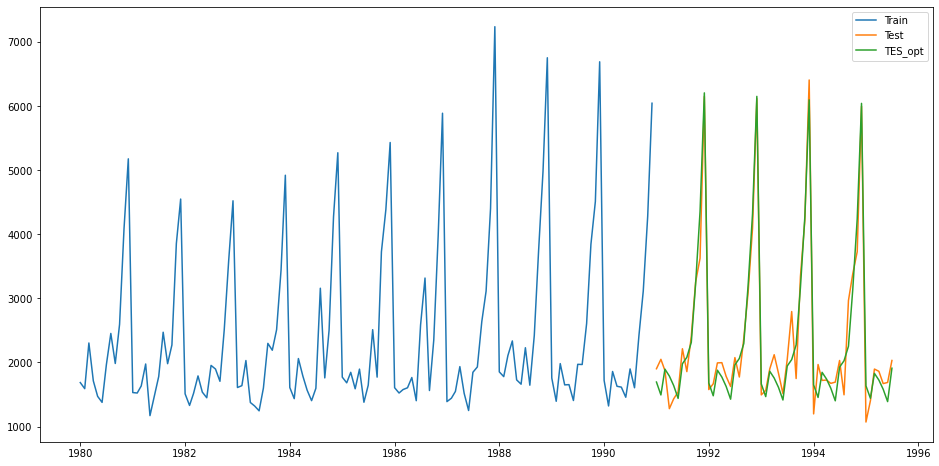

In [194]:
plt.figure(figsize=(16,8))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(predict['TES'], label='TES_opt')
plt.legend(loc='best')
plt.show()

In [195]:
rmse             =  np.sqrt(mean_squared_error(TES_test['Sparkling'], predict['TES']))
mape             =  MAPE(TES_test['Sparkling'], predict['TES'])

print("RMSE is %3.4f MAPE is %3.2f" %( rmse, mape))

RMSE is 302.3123 MAPE is 9.59


In [196]:
tempResultsDf = pd.DataFrame({'Method': 'Triple Exponential Smoothing - Optimized (alpha = 0.05, Beta = 0.05, Gamma = 0.26)', 'RMSE': [rmse], 'MAPE' : [mape]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,RMSE,MAPE
0,Simple Exponential Smoothing (alpha = 0),1275.081766,38.90
0,Double Exponential Smoothing (alpha = 0.65),3850.940953,152.06
0,"Double Exponential Smoothing - Optimized (alpha = 0.05, Beta = 0.05",1418.407668,51.76
0,"Triple Exponential Smoothing - Optimized (alpha = 0.05, Beta = 0.05, Gamma = 0.26)",302.312341,9.59


## Additional Models of forecasting

## Model 4 - Regression On Time

In [197]:
df1=df.copy()

In [198]:
time = [i+1 for i in range(len(df1))]
df1['time'] = time

In [199]:
df1.head(2)

,Sparkling,time
YearMonth,,
1980-01-01,1686,1
1980-02-01,1591,2


In [200]:
train=df1[df1.index.year <1991]
test=df1[df1.index.year >=1991]

In [201]:
x_train = train.drop('Sparkling',axis=1)
x_test  = test.drop('Sparkling', axis=1)
y_train = train[['Sparkling']]
y_test  = test[['Sparkling']]

In [202]:
from sklearn.linear_model import LinearRegression

In [203]:
lr = LinearRegression()

In [204]:
lr.fit(x_train, y_train)

LinearRegression()

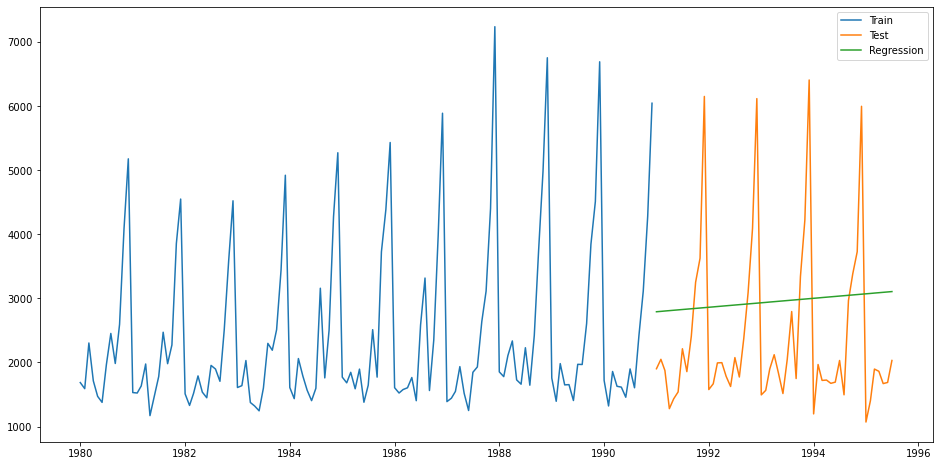

In [205]:
predictions         = lr.predict(x_test)
y_test['RegOnTime'] = predictions

plt.figure(figsize=(16,8))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(y_test['RegOnTime'], label='Regression')
plt.legend(loc='best')

In [206]:
rmse = sqrt(mean_squared_error(test.Sparkling, y_test.RegOnTime))
rmse = round(rmse, 3)
mape = MAPE(test.Sparkling, y_test.RegOnTime)
print("For RegressionOnTime,  RMSE is %3.3f MAPE is %3.2f" %(rmse, mape))

For RegressionOnTime,  RMSE is 1389.135 MAPE is 50.15


In [207]:
tempResultsDf = pd.DataFrame({'Method':['Regression On Time'], 'RMSE': [rmse], 'MAPE' : [mape]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,RMSE,MAPE
0,Simple Exponential Smoothing (alpha = 0),1275.081766,38.90
0,Double Exponential Smoothing (alpha = 0.65),3850.940953,152.06
0,"Double Exponential Smoothing - Optimized (alpha = 0.05, Beta = 0.05",1418.407668,51.76
0,"Triple Exponential Smoothing - Optimized (alpha = 0.05, Beta = 0.05, Gamma = 0.26)",302.312341,9.59
0,Regression On Time,1389.135000,50.15


## Model 5: Naive Approach: $\hat{y}_{t+1} = y_t$

In [208]:
temp = np.asarray(train.Sparkling)

In [209]:
y_hat = test.copy()
y_hat['naive'] = temp[len(temp)-1]

Text(0.5, 1.0, 'Naive Forecast')

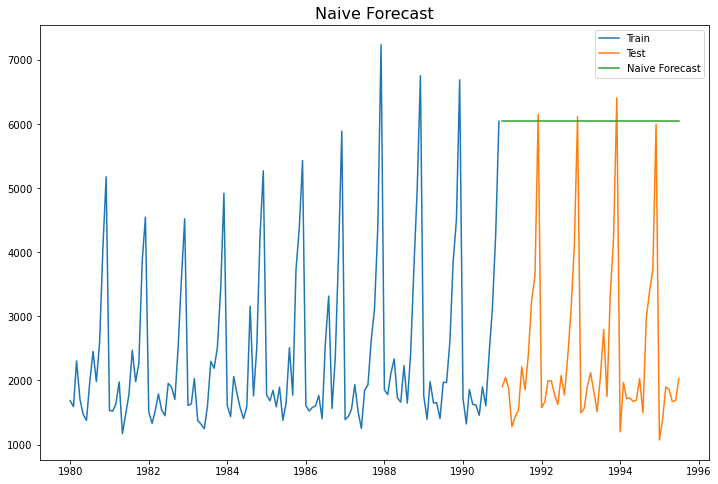

In [210]:
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Sparkling'], label='Train')
plt.plot(test.index,test['Sparkling'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")

In [211]:
rmse = sqrt(mean_squared_error(test.Sparkling, y_hat.naive))
rmse = round(rmse, 3)
mape = MAPE(test.Sparkling, y_hat.naive)
print("For Naive model,  RMSE is %3.3f MAPE is %3.2f" %(rmse, mape))

For Naive model,  RMSE is 3864.279 MAPE is 152.87


In [212]:
tempResultsDf = pd.DataFrame({'Method':['Naive model'], 'RMSE': [rmse], 'MAPE' : [mape]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,RMSE,MAPE
0,Simple Exponential Smoothing (alpha = 0),1275.081766,38.90
0,Double Exponential Smoothing (alpha = 0.65),3850.940953,152.06
0,"Double Exponential Smoothing - Optimized (alpha = 0.05, Beta = 0.05",1418.407668,51.76
0,"Triple Exponential Smoothing - Optimized (alpha = 0.05, Beta = 0.05, Gamma = 0.26)",302.312341,9.59
0,Regression On Time,1389.135000,50.15
0,Naive model,3864.279000,152.87


## Model 6: Simple Average

In [213]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Sparkling'].mean()

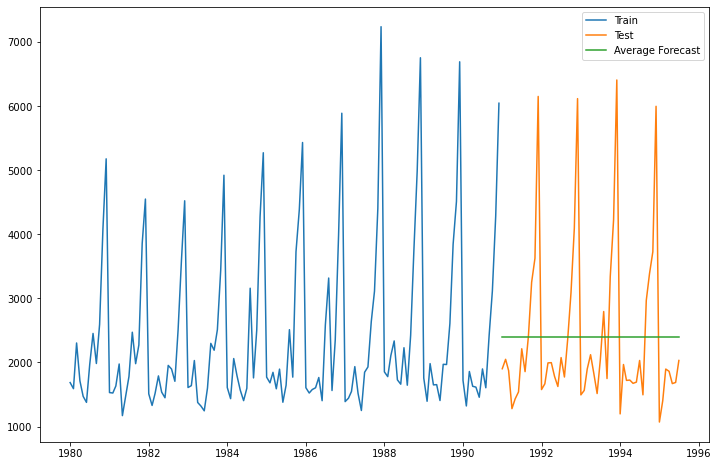

In [214]:
plt.figure(figsize=(12,8))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')

In [215]:
rmse = sqrt(mean_squared_error(test.Sparkling, y_hat_avg.avg_forecast))
rmse = round(rmse, 3)
mape = MAPE(test.Sparkling, y_hat_avg.avg_forecast)
print("For Simple Average model,  RMSE is %3.3f MAPE is %3.2f" %(rmse, mape))

For Simple Average model,  RMSE is 1275.082 MAPE is 38.90


In [216]:
tempResultsDf = pd.DataFrame({'Method':['Simple Average'], 'RMSE': [rmse], 'MAPE' : [mape]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,RMSE,MAPE
0,Simple Exponential Smoothing (alpha = 0),1275.081766,38.90
0,Double Exponential Smoothing (alpha = 0.65),3850.940953,152.06
0,"Double Exponential Smoothing - Optimized (alpha = 0.05, Beta = 0.05",1418.407668,51.76
0,"Triple Exponential Smoothing - Optimized (alpha = 0.05, Beta = 0.05, Gamma = 0.26)",302.312341,9.59
0,Regression On Time,1389.135000,50.15
0,Naive model,3864.279000,152.87
0,Simple Average,1275.082000,38.90


## Model 7: Moving Average (MA)

In [217]:
df_MA = df.copy()

In [218]:
df_MA['moving_avg_4_period']  = df_MA['Sparkling'].rolling(4).mean()
df_MA['moving_avg_6_period']  = df_MA['Sparkling'].rolling(6).mean()
df_MA['moving_avg_8_period']  = df_MA['Sparkling'].rolling(8).mean()
df_MA['moving_avg_12_period'] = df_MA['Sparkling'].rolling(12).mean()

For Moving Average model, moving_avg_4_period  RMSE is 1156.590 MAPE is 35.96
For Moving Average model, moving_avg_6_period  RMSE is 1283.927 MAPE is 43.86
For Moving Average model, moving_avg_8_period  RMSE is 1342.568 MAPE is 46.46
For Moving Average model, moving_avg_12_period  RMSE is 1267.925 MAPE is 40.19


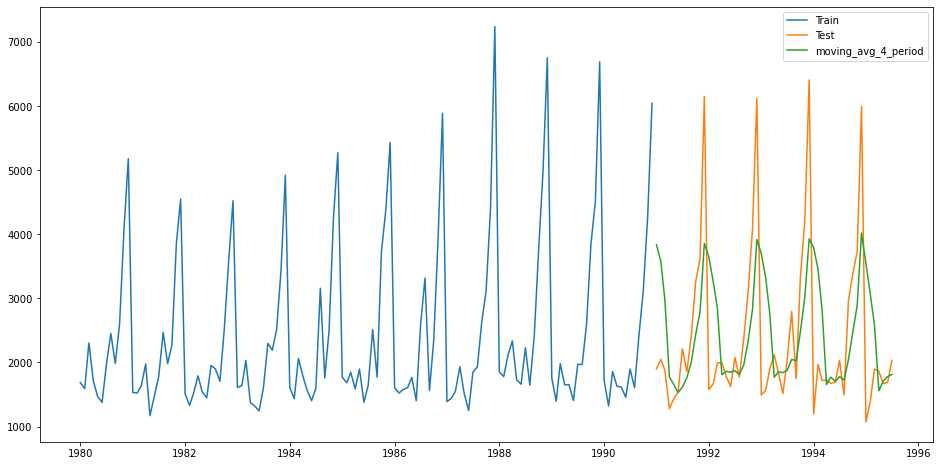

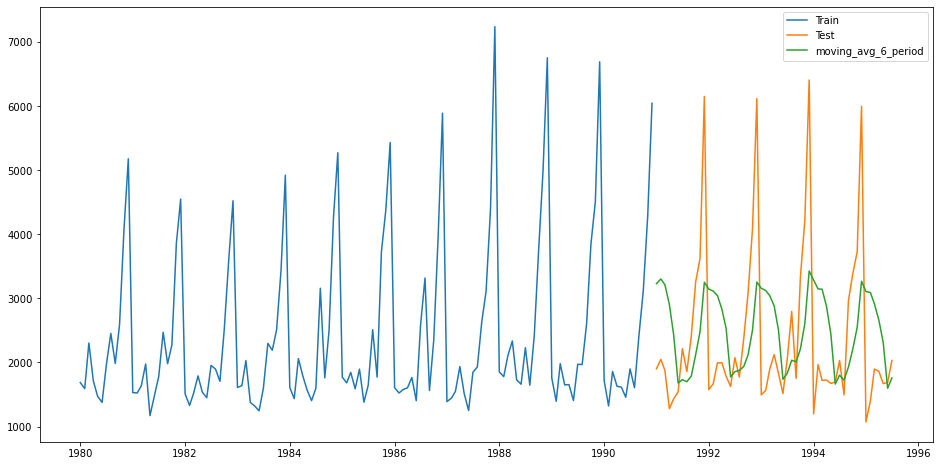

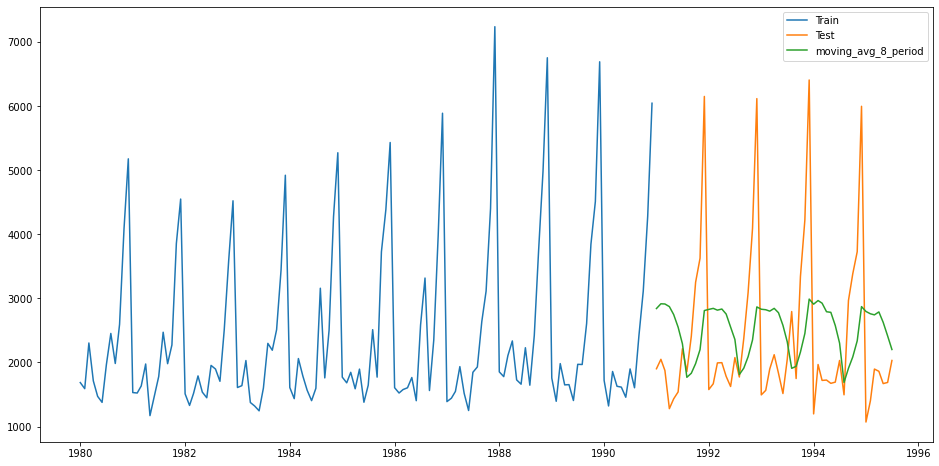

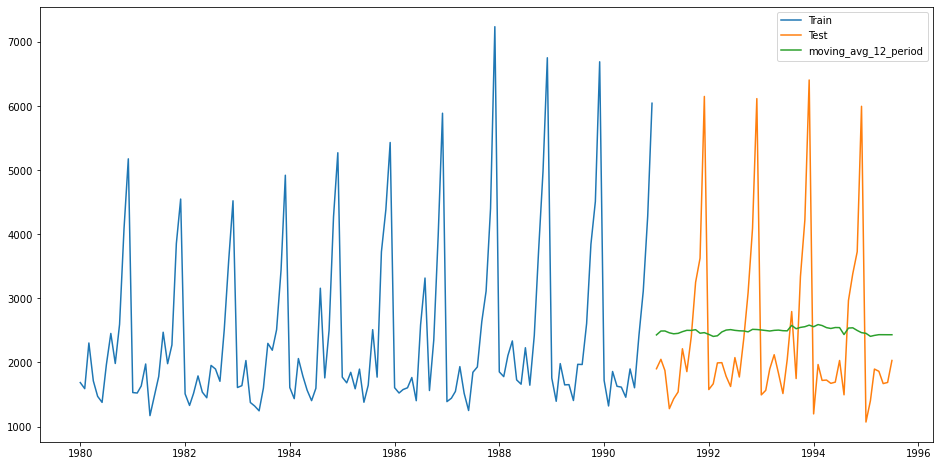

In [219]:
cols = ['moving_avg_4_period','moving_avg_6_period','moving_avg_8_period','moving_avg_12_period']

#Creating train and test set 
train=df_MA[df_MA.index.year <1991]
test=df_MA[df_MA.index.year >=1991]

y_hat_avg = test.copy()

for col_name in cols:
    
    plt.figure(figsize=(16,8))
    plt.plot(train['Sparkling'], label='Train')
    plt.plot(test['Sparkling'], label='Test')
    plt.plot(y_hat_avg[col_name], label = col_name)
    plt.legend(loc = 'best')

    rmse = sqrt(mean_squared_error(test.Sparkling, y_hat_avg[col_name]))
    rmse = round(rmse, 3)
    mape = MAPE(test.Sparkling, y_hat_avg[col_name])
    print("For Moving Average model, %s  RMSE is %3.3f MAPE is %3.2f" %(col_name, rmse, mape))
    
    #Defining the data frame with the model evaluation parameters

    tempResultsDf = pd.DataFrame({'Method':[col_name], 'RMSE': [rmse], 'MAPE' : [mape]})
    resultsDf = pd.concat([resultsDf, tempResultsDf])

In [220]:
resultsDf

,Method,RMSE,MAPE
0,Simple Exponential Smoothing (alpha = 0),1275.081766,38.90
0,Double Exponential Smoothing (alpha = 0.65),3850.940953,152.06
0,"Double Exponential Smoothing - Optimized (alpha = 0.05, Beta = 0.05",1418.407668,51.76
0,"Triple Exponential Smoothing - Optimized (alpha = 0.05, Beta = 0.05, Gamma = 0.26)",302.312341,9.59
0,Regression On Time,1389.135000,50.15
0,Naive model,3864.279000,152.87
0,Simple Average,1275.082000,38.90
0,moving_avg_4_period,1156.590000,35.96
0,moving_avg_6_period,1283.927000,43.86
0,moving_avg_8_period,1342.568000,46.46


## Inference

### It is seen that Holt's Winter Multiplicative (Triple Exponential smoothing - Optimized) performs better than other models.

## Question 5: Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

<span style="font-family: Arial; font-weight:bold;font-size:1.75em;color:#0e92ea"> Answer 5 :

##  Check for Stationarity

#### In the present case, Augmented Dickey Fuller (ADF) Test is used to check for stationarity. In ADF test, there are two hypothesis to test. 

#### Null Hypothesis (H0): Time Series is Non Stationary
#### Alternate Hypothesis (H1): Time Series is Stationary

#### The result is interpreted using the p-value from the test. 

#### p-value > 0.05: Fail to reject the null hypothesis (H0), the data is non-stationary.
#### p-value <= 0.05: Reject the null hypothesis (H0), the data is stationary.

In [221]:
train=df[df.index.year <1991]
test=df[df.index.year >=1991]

In [222]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

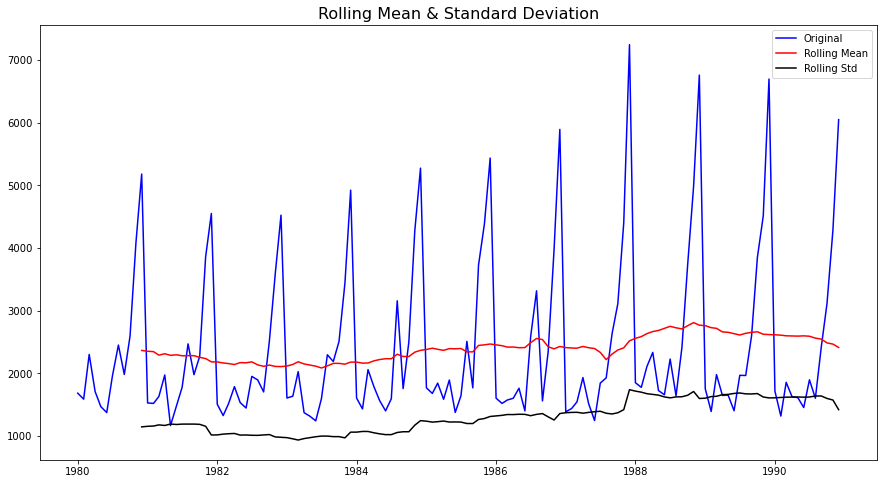

Results of Dickey-Fuller Test:
Test Statistic                -1.208926  
p-value                        0.669744  
#Lags Used                     12.000000 
Number of Observations Used    119.000000
Critical Value (1%)           -3.486535  
Critical Value (5%)           -2.886151  
Critical Value (10%)          -2.579896  
dtype: float64 



In [223]:
test_stationarity(train)

#### At 0.05 alpha, we can say that the time series is non-stationary as the p-value >0.05 Hence, differentiation is required.

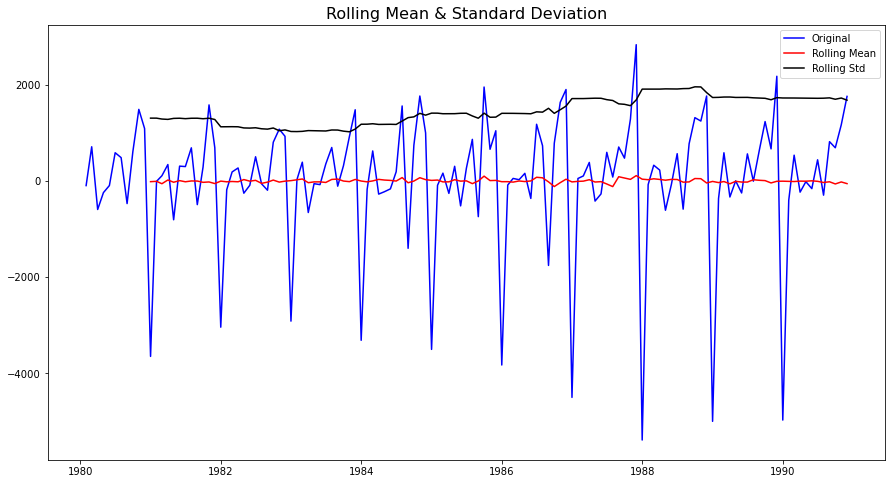

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [224]:
test_stationarity(train.diff().dropna())

#### After differentiation, It is observed that the  p-value (alpha) < 0.05. So, the series is now stationary.

## Question 6:  Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE. 


<span style="font-family: Arial; font-weight:bold;font-size:1.75em;color:#0e92ea"> Answer 6 :

## ARIMA

In [225]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 4
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.


import itertools
p =  q = range(0, 4)
d=range(1, 2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))


Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [226]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [227]:
train.tail(2)

,Sparkling
YearMonth,
1990-11-01,4286
1990-12-01,6047


In [228]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2269.582796371201
ARIMA(0, 1, 1) - AIC:2264.9064375690555
ARIMA(0, 1, 2) - AIC:2232.783097684015
ARIMA(0, 1, 3) - AIC:2233.0166051373762
ARIMA(1, 1, 0) - AIC:2268.528060571409
ARIMA(1, 1, 1) - AIC:2235.0139453494035
ARIMA(1, 1, 2) - AIC:2233.5976471188837
ARIMA(1, 1, 3) - AIC:2234.5741415459784
ARIMA(2, 1, 0) - AIC:2262.035600127695
ARIMA(2, 1, 1) - AIC:2232.3604898811686
ARIMA(2, 1, 2) - AIC:2210.616712375531
ARIMA(2, 1, 3) - AIC:2229.358093771449
ARIMA(3, 1, 0) - AIC:2259.4715549319767
ARIMA(3, 1, 1) - AIC:2233.921760413505
ARIMA(3, 1, 2) - AIC:2228.9275753222573
ARIMA(3, 1, 3) - AIC:2225.6615585251448


In [95]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
10,"(2, 1, 2)",2210.616712
15,"(3, 1, 3)",2225.661559
14,"(3, 1, 2)",2228.927575
11,"(2, 1, 3)",2229.358094
9,"(2, 1, 1)",2232.360490
2,"(0, 1, 2)",2232.783098
3,"(0, 1, 3)",2233.016605
6,"(1, 1, 2)",2233.597647
13,"(3, 1, 1)",2233.921760
7,"(1, 1, 3)",2234.574142


In [229]:
## ARIMA(2,1,2) has the lowest AIC
auto_ARIMA = ARIMA(train, order=(2,1,2))

results_Arima = auto_ARIMA.fit()

print(results_Arima.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.308
Method:                       css-mle   S.D. of innovations           1012.363
Date:                Sat, 24 Apr 2021   AIC                           2210.617
Time:                        21:26:33   BIC                           2227.868
Sample:                    02-01-1980   HQIC                          2217.627
                         - 12-01-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5858      0.516     10.823      0.000       4.574       6.597
ar.L1.D.Sparkling     1.2699      0.074     17.047      0.000       1.124       1.416
ar.L2.D.Sparkling    -0.

In [230]:
test.shape

(55, 1)

In [231]:
test= test.astype(float)
final_hat_avg =test.copy()
predicted_auto_ARIMA = results_Arima.forecast(steps=len(test))

In [232]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test,predicted_auto_ARIMA [0],squared=False)
mape = MAPE(test['Sparkling'], predicted_auto_ARIMA[0])
print(rmse,mape)

1374.8134164832381 48.38


In [233]:
resultsDf1 = pd.DataFrame({'RMSE': [rmse], 'MAPE' : [mape]}
                           ,index=['ARIMA(2,1,2)'])

resultsDf1

,RMSE,MAPE
"ARIMA(2,1,2)",1374.813416,48.38


In [234]:
tempResultsDf = pd.DataFrame({'Method': 'Auto ARIMA(2,1,2)', 'RMSE': [rmse], 'MAPE' : [mape]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,RMSE,MAPE
0,Simple Exponential Smoothing (alpha = 0),1275.081766,38.90
0,Double Exponential Smoothing (alpha = 0.65),3850.940953,152.06
0,"Double Exponential Smoothing - Optimized (alpha = 0.05, Beta = 0.05",1418.407668,51.76
0,"Triple Exponential Smoothing - Optimized (alpha = 0.05, Beta = 0.05, Gamma = 0.26)",302.312341,9.59
0,Regression On Time,1389.135000,50.15
0,Naive model,3864.279000,152.87
0,Simple Average,1275.082000,38.90
0,moving_avg_4_period,1156.590000,35.96
0,moving_avg_6_period,1283.927000,43.86
0,moving_avg_8_period,1342.568000,46.46


## SARIMA

#### Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

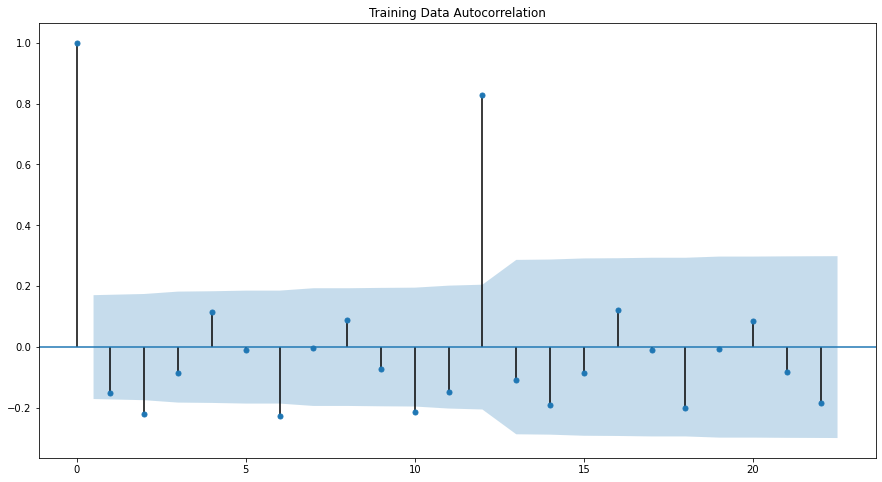

In [102]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop');

#### We can see that the data has seasonality

In [766]:
### As the dataset has seasonality.. Let's build the model with SARIMA

SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
print(SARIMA_AIC)

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []


In [767]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,2)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(0, 1, 0, 12)
Model: (1, 1, 1)(0, 1, 1, 12)
Model: (1, 1, 2)(0, 1, 2, 12)
Model: (1, 1, 3)(0, 1, 3, 12)
Model: (2, 1, 0)(1, 0, 0, 12)
Model: (2, 1, 1)(1, 0, 1, 12)
Model: (2, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 3)(1, 0, 3, 12)
Model: (3, 1, 0)(1, 1, 0, 12)
Model: (3, 1, 1)(1, 1, 1, 12)
Model: (3, 1, 2)(1, 1, 2, 12)
Model: (3, 1, 3)(1, 1, 3, 12)


In [768]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit()
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
        

SARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:1822.982485206384
SARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:1626.8626334544545
SARIMA(0, 1, 0)x(0, 1, 2, 12) - AIC:1452.6773574277136
SARIMA(0, 1, 0)x(0, 1, 3, 12) - AIC:3757.825459936369
SARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:1646.3778167661442
SARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:1628.3243908898878
SARIMA(0, 1, 0)x(1, 1, 2, 12) - AIC:1454.5289621897605
SARIMA(0, 1, 0)x(1, 1, 3, 12) - AIC:3378.4416930792663
SARIMA(0, 1, 0)x(2, 1, 0, 12) - AIC:1466.6211360755017
SARIMA(0, 1, 0)x(2, 1, 1, 12) - AIC:1468.5000981881242
SARIMA(0, 1, 0)x(2, 1, 2, 12) - AIC:1456.0729761861126
SARIMA(0, 1, 0)x(2, 1, 3, 12) - AIC:2125.564404281333
SARIMA(0, 1, 0)x(3, 1, 0, 12) - AIC:1289.2398197439918
SARIMA(0, 1, 0)x(3, 1, 1, 12) - AIC:1291.244887799378
SARIMA(0, 1, 0)x(3, 1, 2, 12) - AIC:1289.1183220597957
SARIMA(0, 1, 0)x(3, 1, 3, 12) - AIC:1320.9777723195807
SARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:1760.6565719765852
SARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:1569.6639234225354
SARIMA(0, 1, 1

SARIMA(2, 1, 1)x(1, 1, 3, 12) - AIC:2934.578668730247
SARIMA(2, 1, 1)x(2, 1, 0, 12) - AIC:1400.9854074353063
SARIMA(2, 1, 1)x(2, 1, 1, 12) - AIC:1401.9924736935218
SARIMA(2, 1, 1)x(2, 1, 2, 12) - AIC:1403.8183451959999
SARIMA(2, 1, 1)x(2, 1, 3, 12) - AIC:1411.2357727650256
SARIMA(2, 1, 1)x(3, 1, 0, 12) - AIC:1228.313276608494
SARIMA(2, 1, 1)x(3, 1, 1, 12) - AIC:1230.1483341237347
SARIMA(2, 1, 1)x(3, 1, 2, 12) - AIC:1230.7597831312914
SARIMA(2, 1, 1)x(3, 1, 3, 12) - AIC:1274.2893724189455
SARIMA(2, 1, 2)x(0, 1, 0, 12) - AIC:1742.2930705526162
SARIMA(2, 1, 2)x(0, 1, 1, 12) - AIC:1556.9467334467613
SARIMA(2, 1, 2)x(0, 1, 2, 12) - AIC:1384.3176180790124
SARIMA(2, 1, 2)x(0, 1, 3, 12) - AIC:1650.0659414705347
SARIMA(2, 1, 2)x(1, 1, 0, 12) - AIC:1573.1168644409863
SARIMA(2, 1, 2)x(1, 1, 1, 12) - AIC:1558.1200886862703
SARIMA(2, 1, 2)x(1, 1, 2, 12) - AIC:1386.097241247963
SARIMA(2, 1, 2)x(1, 1, 3, 12) - AIC:3698.1706324778033
SARIMA(2, 1, 2)x(2, 1, 0, 12) - AIC:1399.775633997503
SARIMA(2, 1, 2

In [769]:
SARIMA_AIC.sort_values(by=['AIC'],ascending=True).head()

,param,seasonal,AIC
252,"(3, 1, 3)","(3, 1, 0, 12)",1213.282551
253,"(3, 1, 3)","(3, 1, 1, 12)",1215.255635
220,"(3, 1, 1)","(3, 1, 0, 12)",1215.898777
254,"(3, 1, 3)","(3, 1, 2, 12)",1216.491179
236,"(3, 1, 2)","(3, 1, 0, 12)",1216.859172


In [103]:
## SARIMA
mod = sm.tsa.statespace.SARIMAX(train,
                                order=(3,1,3),
                                seasonal_order=(3, 1, 0, 12),
                    
                                enforce_invertibility=False)
results_SARIMA = mod.fit()
print(results_SARIMA.summary())

                                      SARIMAX Results                                      
Dep. Variable:                           Sparkling   No. Observations:                  132
Model:             SARIMAX(3, 1, 3)x(3, 1, [], 12)   Log Likelihood                -881.721
Date:                             Sat, 24 Apr 2021   AIC                           1783.441
Time:                                     15:26:47   BIC                           1811.233
Sample:                                 01-01-1980   HQIC                          1794.727
                                      - 12-01-1990                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6910      0.185     -9.135      0.000      -2.054      -1.328
ar.L2         -0.6386      

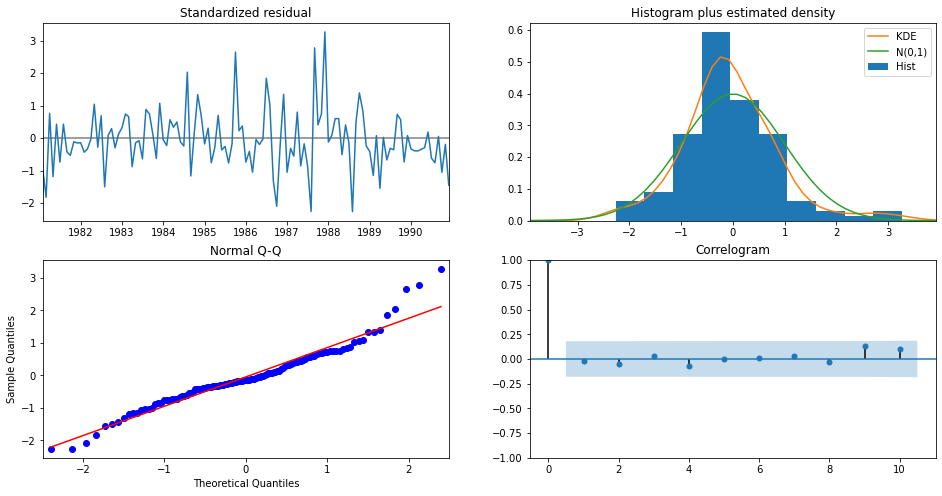

In [104]:
results_SARIMA.plot_diagnostics(figsize=(16, 8))
plt.show()

In [235]:
test= test.astype(float)
final_hat_avg =test.copy()
pred_Sarima = results_SARIMA.get_forecast(steps=len(test))
pred_Sarima.predicted_mean

1991-01-01    1371.325789
1991-02-01    1363.567976
1991-03-01    1642.368984
1991-04-01    1705.752938
1991-05-01    1417.742206
1991-06-01    1360.025926
1991-07-01    1795.248456
1991-08-01    1575.116004
1991-09-01    2380.915012
1991-10-01    3169.108490
1991-11-01    4370.965089
1991-12-01    6179.468837
1992-01-01    1485.332370
1992-02-01    1183.507994
1992-03-01    1700.417352
1992-04-01    1554.798870
1992-05-01    1407.850483
1992-06-01    1271.821956
1992-07-01    1727.642029
1992-08-01    1531.457359
1992-09-01    2239.344635
1992-10-01    3210.717202
1992-11-01    4230.045405
1992-12-01    6184.445543
1993-01-01    1325.763461
1993-02-01    1161.668376
1993-03-01    1567.905350
1993-04-01    1480.130261
1993-05-01    1322.826734
1993-06-01    1172.841716
1993-07-01    1675.591458
1993-08-01    1416.307086
1993-09-01    2230.310932
1993-10-01    3066.944821
1993-11-01    4194.702490
1993-12-01    6040.638740
1994-01-01    1289.455511
1994-02-01    1053.619015
1994-03-01  

In [236]:
pred_Sarima.summary_frame()

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1991-01-01,1371.325789,428.821132,530.851814,2211.799763
1991-02-01,1363.567976,447.567572,486.351655,2240.784297
1991-03-01,1642.368984,448.623686,763.082718,2521.655251
1991-04-01,1705.752938,453.359096,817.185437,2594.320439
1991-05-01,1417.742206,453.960124,527.996711,2307.487700
1991-06-01,1360.025926,457.591617,463.162836,2256.889016
1991-07-01,1795.248456,458.699385,896.214180,2694.282731
1991-08-01,1575.116004,461.107083,671.362728,2478.869280
1991-09-01,2380.915012,463.100152,1473.255393,3288.574632
1991-10-01,3169.108490,464.515959,2258.673941,4079.543040


In [237]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test ,pred_Sarima.predicted_mean))
mape = MAPE(test['Sparkling'], pred_Sarima.predicted_mean)
print(rmse,mape)


444.72784597664815 15.2


In [238]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse],'MAPE' : [mape]}
                           ,index=['Auto SARIMA(3,1,3)(3, 1, 0, 12)'])

resultsDf1 = pd.concat([resultsDf1, temp_resultsDf])
resultsDf1

,RMSE,MAPE
"ARIMA(2,1,2)",1374.813416,48.38
"Auto SARIMA(3,1,3)(3, 1, 0, 12)",444.727846,15.20


In [239]:
resultsDf

,Method,RMSE,MAPE
0,Simple Exponential Smoothing (alpha = 0),1275.081766,38.90
0,Double Exponential Smoothing (alpha = 0.65),3850.940953,152.06
0,"Double Exponential Smoothing - Optimized (alpha = 0.05, Beta = 0.05",1418.407668,51.76
0,"Triple Exponential Smoothing - Optimized (alpha = 0.05, Beta = 0.05, Gamma = 0.26)",302.312341,9.59
0,Regression On Time,1389.135000,50.15
0,Naive model,3864.279000,152.87
0,Simple Average,1275.082000,38.90
0,moving_avg_4_period,1156.590000,35.96
0,moving_avg_6_period,1283.927000,43.86
0,moving_avg_8_period,1342.568000,46.46


In [240]:
tempResultsDf = pd.DataFrame({'Method': 'Auto SARIMA(3,1,3)(3, 1, 0, 12)', 'RMSE': [rmse],'MAPE' : [mape]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,RMSE,MAPE
0,Simple Exponential Smoothing (alpha = 0),1275.081766,38.90
0,Double Exponential Smoothing (alpha = 0.65),3850.940953,152.06
0,"Double Exponential Smoothing - Optimized (alpha = 0.05, Beta = 0.05",1418.407668,51.76
0,"Triple Exponential Smoothing - Optimized (alpha = 0.05, Beta = 0.05, Gamma = 0.26)",302.312341,9.59
0,Regression On Time,1389.135000,50.15
0,Naive model,3864.279000,152.87
0,Simple Average,1275.082000,38.90
0,moving_avg_4_period,1156.590000,35.96
0,moving_avg_6_period,1283.927000,43.86
0,moving_avg_8_period,1342.568000,46.46


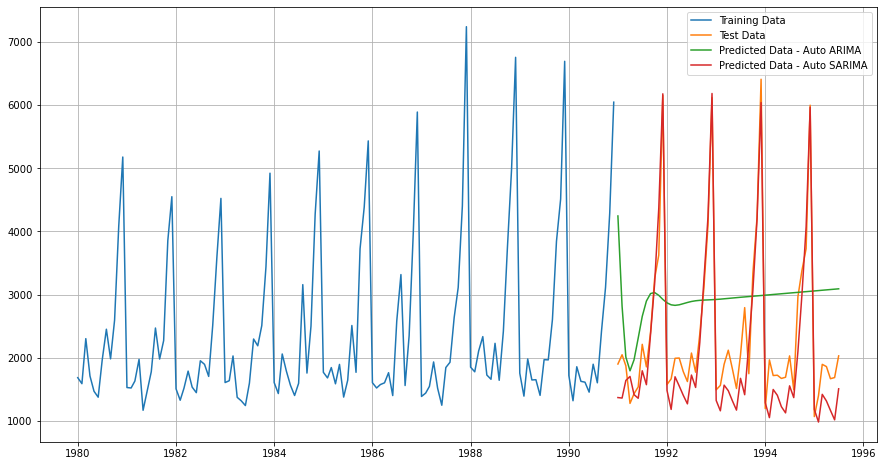

In [241]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,predicted_auto_ARIMA[0],label='Predicted Data - Auto ARIMA')
plt.plot(test.index,pred_Sarima.predicted_mean,label='Predicted Data - Auto SARIMA')
plt.legend(loc='best')
plt.grid();

## Question 7: Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

<span style="font-family: Arial; font-weight:bold;font-size:1.75em;color:#0e92ea"> Answer 7 :

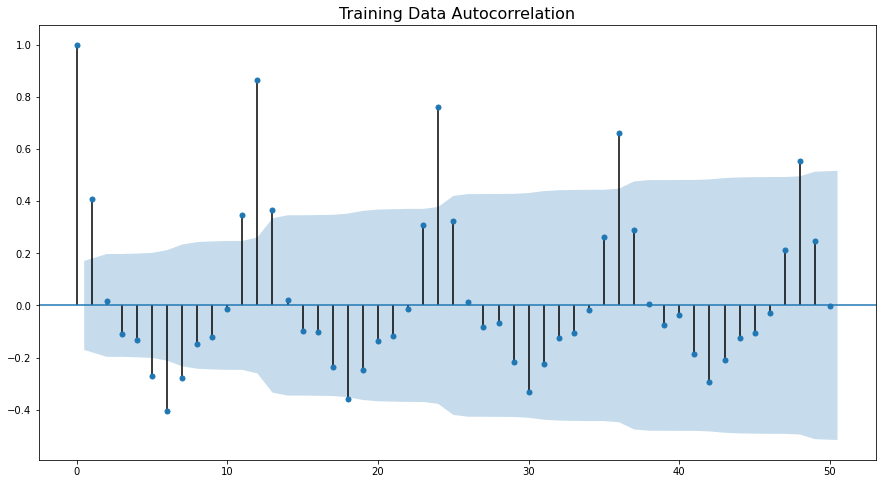

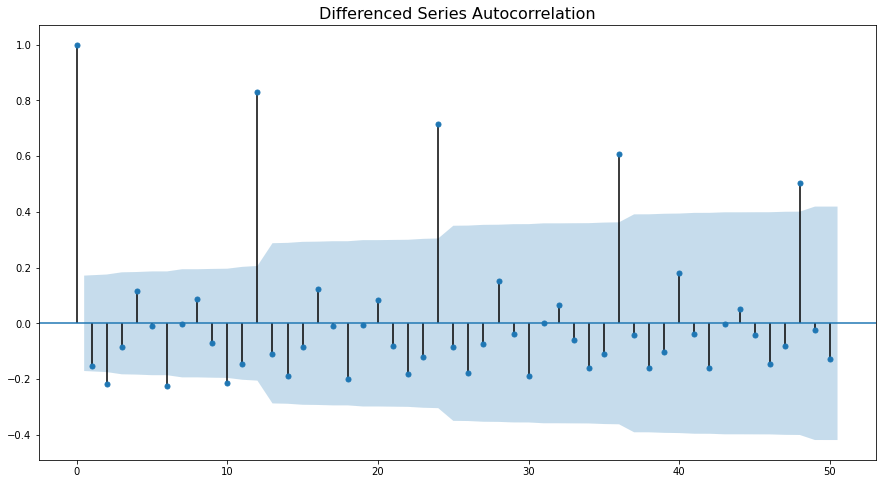

In [242]:
plot_acf(train['Sparkling'],lags=50,title='Training Data Autocorrelation',missing='drop')
plot_acf(train['Sparkling'].diff().dropna(),lags=50,title='Differenced Series Autocorrelation')
plt.show()


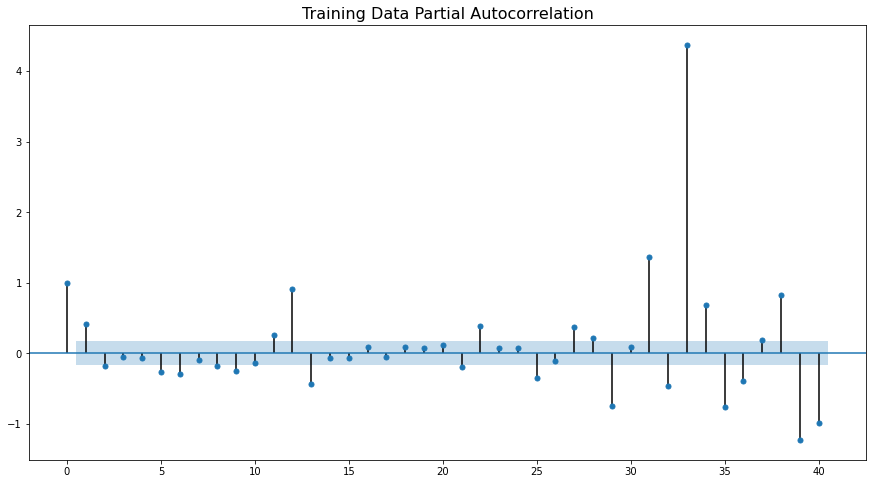

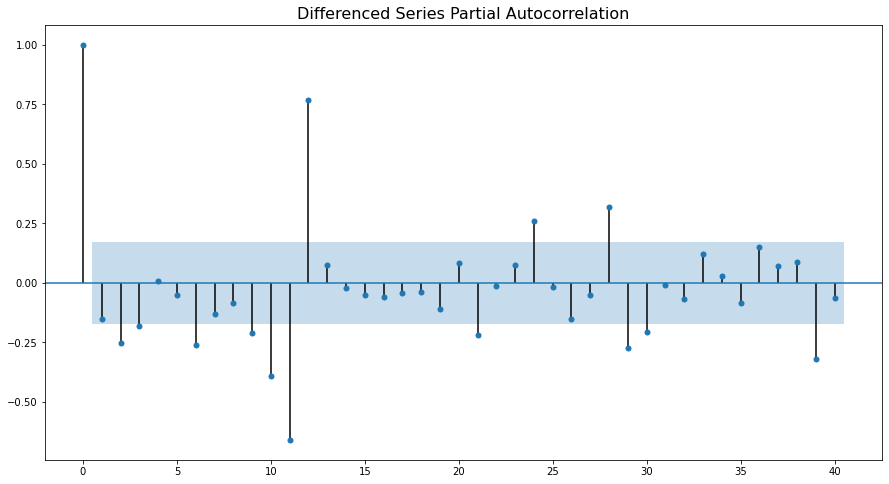

In [243]:
plot_pacf(train['Sparkling'],title='Training Data Partial Autocorrelation',lags=40)
plot_pacf(train['Sparkling'].diff().dropna(),lags=40,title='Differenced Series Partial Autocorrelation')
plt.show()

## Manual ARIMA Model with Order (1,1,1)

In [244]:
## ARIMA(1,1,1)
Manu_ARIMA = ARIMA(train, order=(1,1,1))

results_Arima_Manu = Manu_ARIMA.fit()

print(results_Arima_Manu.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1113.507
Method:                       css-mle   S.D. of innovations           1171.378
Date:                Sat, 24 Apr 2021   AIC                           2235.014
Time:                        21:28:02   BIC                           2246.515
Sample:                    02-01-1980   HQIC                          2239.687
                         - 12-01-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.7491      4.616      1.462      0.144      -2.299      15.797
ar.L1.D.Sparkling     0.4289      0.082      5.221      0.000       0.268       0.590
ma.L1.D.Sparkling    -1.

In [245]:
test1 = test.astype(float)
final_hat_avg =test1.copy()
predicted_Manu_ARIMA = results_Arima_Manu.forecast(steps=len(test))

In [246]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test,predicted_Manu_ARIMA [0],squared=False)
mape = MAPE(test['Sparkling'], predicted_Manu_ARIMA[0])
print(rmse,mape)

1461.6735653054131 53.57


In [247]:
resultsDf2 = pd.DataFrame({'RMSE': [rmse], 'MAPE' : [mape]}
                           ,index=['Non-auto ARIMA(1,1,1)'])

resultsDf2

,RMSE,MAPE
"Non-auto ARIMA(1,1,1)",1461.673565,53.57


## Manual SARIMA Model with parameters 

In [248]:
mod = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(1,1,1),
                                seasonal_order=(1, 0, 4, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=False)
results = mod.fit(maxiter=100000)
print(results.summary())

                                           SARIMAX Results                                           
Dep. Variable:                                     Sparkling   No. Observations:                  132
Model:             SARIMAX(1, 1, 1)x(1, 0, [1, 2, 3, 4], 12)   Log Likelihood                -991.307
Date:                                       Sat, 24 Apr 2021   AIC                           1998.614
Time:                                               21:28:31   BIC                           2021.615
Sample:                                           01-01-1980   HQIC                          2007.960
                                                - 12-01-1990                                         
Covariance Type:                                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2434     

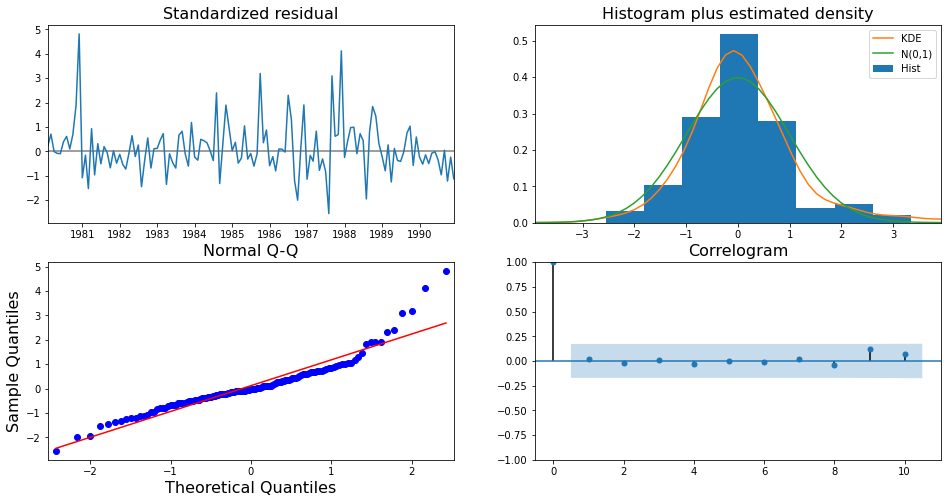

In [249]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

#### Predict on the Test Set using this model and evaluate the model.

In [250]:
pred = results.get_forecast(steps=len(test))
pred.predicted_mean

1991-01-01    1639.345124
1991-02-01    1421.655505
1991-03-01    1916.102762
1991-04-01    1760.745292
1991-05-01    1673.461999
1991-06-01    1501.421472
1991-07-01    1988.219330
1991-08-01    1800.316059
1991-09-01    2438.462059
1991-10-01    3294.258608
1991-11-01    4359.039943
1991-12-01    6168.427108
1992-01-01    1705.735674
1992-02-01    1459.934724
1992-03-01    1933.767045
1992-04-01    1777.201361
1992-05-01    1694.476489
1992-06-01    1518.238319
1992-07-01    2003.106131
1992-08-01    1845.744115
1992-09-01    2450.562075
1992-10-01    3307.274615
1992-11-01    4333.670637
1992-12-01    6137.059705
1993-01-01    1729.569677
1993-02-01    1485.179233
1993-03-01    1947.128972
1993-04-01    1798.103171
1993-05-01    1713.019407
1993-06-01    1541.559039
1993-07-01    2017.571945
1993-08-01    1857.491181
1993-09-01    2452.212529
1993-10-01    3287.303116
1993-11-01    4308.128107
1993-12-01    6074.621869
1994-01-01    1746.597476
1994-02-01    1509.575244
1994-03-01  

In [251]:
rmse = mean_squared_error(test['Sparkling'],pred.predicted_mean,squared=False)
print(rmse)

305.5139897561135


In [252]:
temp_resultsDf1 = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['Non-auto SARIMA(1, 1, 1)(1, 0, 4, 12)'])


resultsDf2 = pd.concat([resultsDf2,temp_resultsDf1])

resultsDf2

,RMSE,MAPE
"Non-auto ARIMA(1,1,1)",1461.673565,53.57
"Non-auto SARIMA(1, 1, 1)(1, 0, 4, 12)",305.513990,NaN


## Question 8: Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

<span style="font-family: Arial; font-weight:bold;font-size:1.75em;color:#0e92ea"> Answer 8 :

In [253]:
tempResultsDf = pd.DataFrame({'Method': 'Non-auto SARIMA(1, 1, 1)(1, 0, 4, 12)', 'RMSE': [rmse]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,RMSE,MAPE
0,Simple Exponential Smoothing (alpha = 0),1275.081766,38.90
0,Double Exponential Smoothing (alpha = 0.65),3850.940953,152.06
0,"Double Exponential Smoothing - Optimized (alpha = 0.05, Beta = 0.05",1418.407668,51.76
0,"Triple Exponential Smoothing - Optimized (alpha = 0.05, Beta = 0.05, Gamma = 0.26)",302.312341,9.59
0,Regression On Time,1389.135000,50.15
0,Naive model,3864.279000,152.87
0,Simple Average,1275.082000,38.90
0,moving_avg_4_period,1156.590000,35.96
0,moving_avg_6_period,1283.927000,43.86
0,moving_avg_8_period,1342.568000,46.46


## Question 9: Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

<span style="font-family: Arial; font-weight:bold;font-size:1.75em;color:#0e92ea"> Answer 9 :

## From the above table, it is seen that Optimized Triple Exponential Smoothing has the minimum RMSE. So, we will consider this model for future forecasting.

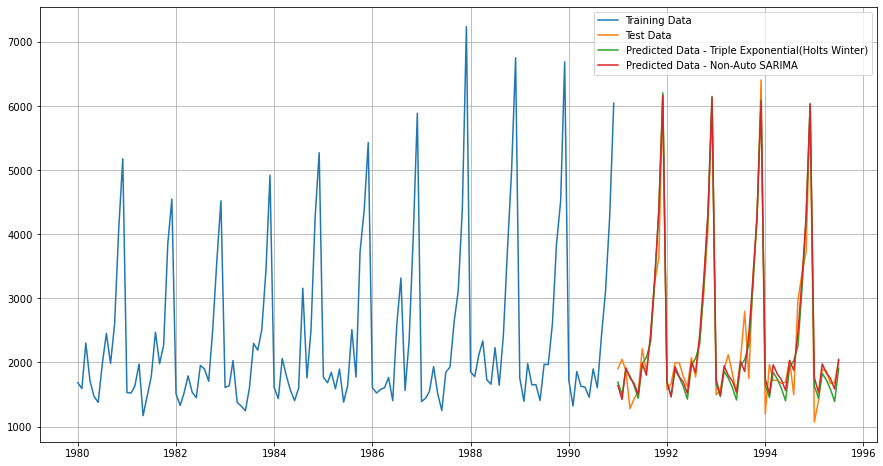

In [142]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,predict['TES'],label='Predicted Data - Triple Exponential(Holts Winter)')
#plt.plot(test.index,pred_Sarima.predicted_mean,label='Predicted Data - AUTO SARIMA')
plt.plot(test.index,pred.predicted_mean,label='Predicted Data - Non-Auto SARIMA')
plt.legend(loc='best')
plt.grid();

## Building Forecast for 12 months

## Holt-Winters Method - Triple Exponential - Multiplicative Model

In [143]:
model_TES_full = ExponentialSmoothing(df['Sparkling'],seasonal_periods = 12, trend='additive',seasonal='multiplicative')

In [144]:
model_TES_full_i_j_k = model_TES_full.fit(smoothing_level=0.05,smoothing_slope=0.05,smoothing_seasonal=0.26,optimized=False,use_brute=True)

In [145]:
prediction_1 = model_TES_full_i_j_k.forecast(steps=12)

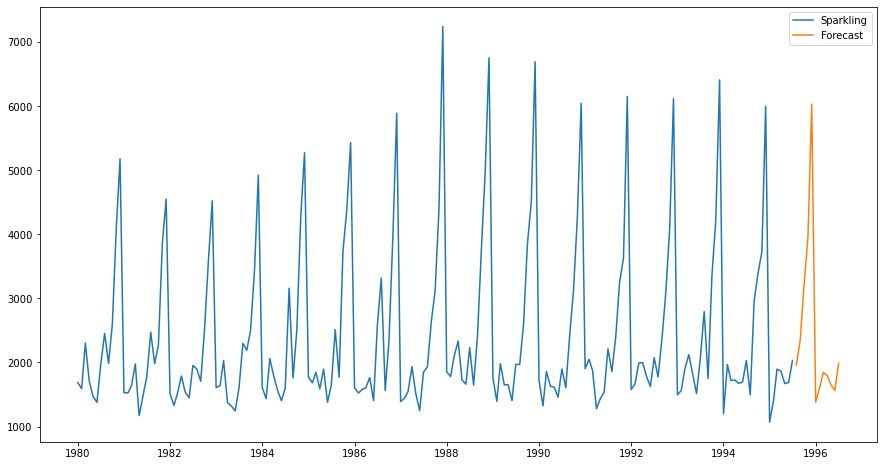

In [146]:
plt.plot(df['Sparkling'], label='Sparkling')
plt.plot(prediction_1, label='Forecast')
plt.legend(loc='best')
plt.show()
#plt.plot(df['Sparkling'], label='Test')

In [148]:
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(model_TES_full_i_j_k.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_CI': prediction_1 + 1.96*np.std(model_TES_full_i_j_k.resid,ddof=1)})
pred_1_df

,lower_CI,prediction,upper_CI
1995-08-01,1256.669067,1961.182465,2665.695864
1995-09-01,1651.566019,2356.079417,3060.592815
1995-10-01,2499.396372,3203.909770,3908.423168
1995-11-01,3263.400457,3967.913856,4672.427254
1995-12-01,5330.491001,6035.004399,6739.517797
1996-01-01,676.916766,1381.430164,2085.943563
1996-02-01,902.537893,1607.051291,2311.564689
1996-03-01,1137.680681,1842.194080,2546.707478
1996-04-01,1093.592915,1798.106313,2502.619711
1996-05-01,946.683898,1651.197296,2355.710694


Text(0.5, 1.0, 'Triple Exponential Smoothing')

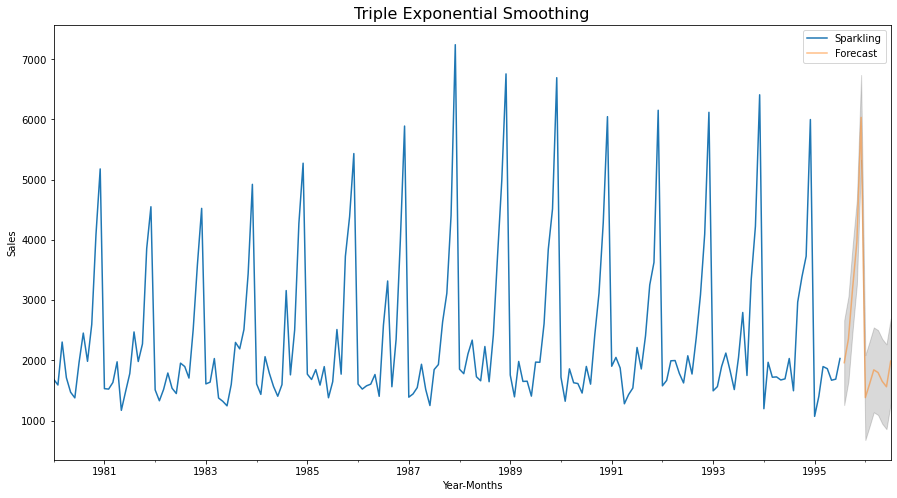

In [149]:
# plot the forecast along with the confidence band

axis = df.plot(label='Sparkling', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_CI'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.legend(loc = 'best')
#plt.legend(fontsize="x-large")
#plt.grid()
plt.title('Triple Exponential Smoothing')

## Non-Auto(manual) SARIMA

In [150]:
## To get the real forecast for 12 months, we will rerun the model on the complete dataset

final_1 = sm.tsa.statespace.SARIMAX(df['Sparkling'],
                                order=(1,1,1),
                                seasonal_order=(1, 0, 4, 12),
                                enforce_invertibility=False,
                                enforce_stationarity=False,)
results = final_1.fit()
print(results.summary())

                                           SARIMAX Results                                           
Dep. Variable:                                     Sparkling   No. Observations:                  187
Model:             SARIMAX(1, 1, 1)x(1, 0, [1, 2, 3, 4], 12)   Log Likelihood               -1100.850
Date:                                       Sat, 24 Apr 2021   AIC                           2217.700
Time:                                               19:12:50   BIC                           2241.002
Sample:                                           01-01-1980   HQIC                          2227.170
                                                - 07-01-1995                                         
Covariance Type:                                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6344   1.

In [151]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('1995-07-01'), dynamic=True, full_results=True)

In [152]:
pred_dynamic_ci = pred_dynamic.conf_int()

In [153]:
pred95 = results.get_forecast(steps=12, alpha=0.05)
pred_ci_95 = pred95.conf_int()

In [154]:
pred_ci_95

,lower Sparkling,upper Sparkling
1995-08-01,-195.010164,2714.038337
1995-09-01,785.445236,4311.987565
1995-10-01,914.612872,4710.974801
1995-11-01,1773.984752,5708.071824
1995-12-01,3081.972342,7095.594672
1996-01-01,-107.133411,3958.075582
1996-02-01,-441.982652,3658.247090
1996-03-01,-61.371817,4068.234752
1996-04-01,-261.682673,3892.756280
1996-05-01,-327.334524,3849.000935


In [155]:
pred_ci_95['Prediction']=pred95.predicted_mean

In [156]:
pred_ci_95

,lower Sparkling,upper Sparkling,Prediction
1995-08-01,-195.010164,2714.038337,1259.514086
1995-09-01,785.445236,4311.987565,2548.716400
1995-10-01,914.612872,4710.974801,2812.793837
1995-11-01,1773.984752,5708.071824,3741.028288
1995-12-01,3081.972342,7095.594672,5088.783507
1996-01-01,-107.133411,3958.075582,1925.471085
1996-02-01,-441.982652,3658.247090,1608.132219
1996-03-01,-61.371817,4068.234752,2003.431468
1996-04-01,-261.682673,3892.756280,1815.536803
1996-05-01,-327.334524,3849.000935,1760.833206


In [157]:
forecast_fullmodel_sarimax = pred95.predicted_mean

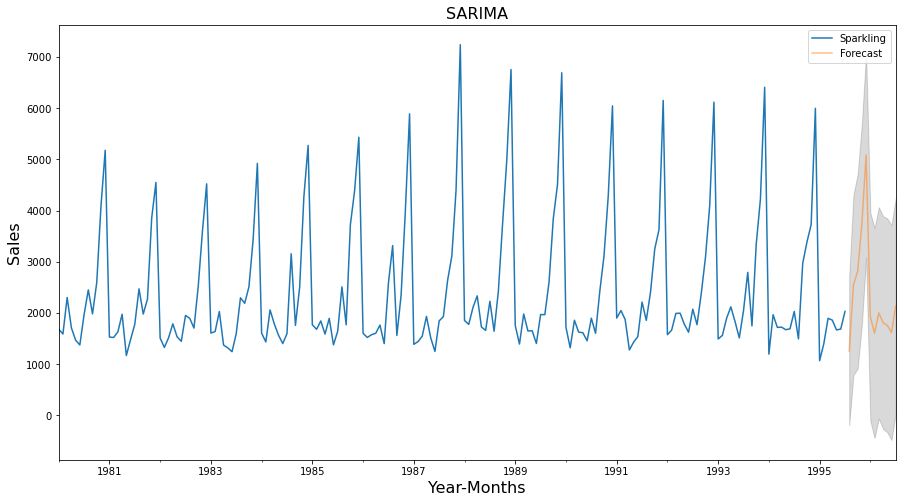

In [158]:
# plot the forecast along with the confidence band
axis = df.plot(label='Sparkling', figsize=(15, 8))
forecast_fullmodel_sarimax.plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(forecast_fullmodel_sarimax.index, pred_ci_95['lower Sparkling'], pred_ci_95['upper Sparkling'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.title('SARIMA')
plt.show()
